In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from scipy.optimize import curve_fit
from sklearn.manifold import TSNE
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score as ss
from scipy.stats import entropy
from sklearn.preprocessing import normalize

In [14]:
# Get data. 
# This line is commented out.
# !wget https://storage.googleapis.com/linnarsson-lab-www-blobs/blobs/cortex/expression_mRNA_17-Aug-2014.txt

In [15]:


# Read data.
data = pd.read_csv("expression_mRNA_17-Aug-2014.txt", header=None, sep='\t')

# Remove first column which is just Nan and take transpose.
data = data.iloc[:, 1:]
data = data.T
print(data.shape)

# Choose first row as column names and delete first row.
col_names = data.iloc[0, :]
col_names[1] = 'group_id'
data.columns = col_names
# data.columns[1] = 'group_id' # Remove space from one of the column names.
data = data.iloc[1:,]

# Select cells from somatosensory cortex ('sscortex')
# sscortex_selection = list(data.tissue == 'sscortex')
# data = data.iloc[sscortex_selection, :]

/home/tharikh/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3134: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,2

(3006, 19983)


In [16]:
# Get the gene expression matrix.
gem = np.array(data.iloc[:, 11:])

# Classes.
major_class = data.level1class
major_class = data.level2class

In [17]:
gem = gem.astype(float)
gem.shape

new_preprocessed_data = gem

In [6]:
zeisel_pc = pd.read_csv("zeisel_2015_pc.csv")
zeisel_logcpm = pd.read_csv("zeisel_2015_logcpm.csv", index_col=0)
zeisel_anno = pd.read_csv('zeisel_2015_clean_anno.csv')

In [7]:
zeisel_pc.shape

(3005, 9)

In [8]:
# class Clustering():
#   def __init__(self):
#     pass


#   def preprocess(self, data, doPreprocess = False):

#     # fitting on the noise by log(cv) = log(mean^alpha + k)
#     if(not doPreprocess):
#         return data
    
#     num_components = 10 # top components to be taken
#     x = np.mean(data, axis = 1) 
#     cv = np.std(data, axis = 1)/x
#     y = np.log(cv)

#     popt, pcov = curve_fit(noiseFunction, x, y)
#     alpha=popt[0]
#     k = popt[1]

#     y_predict = np.log(x ** alpha + k)

#     diff = abs(y - y_predict) 
#     indexes = np.argsort(diff)[-num_components:] #sort based on distance and take top components

#     return data[:,indexes]
# #     return data[:,10:]

#   def findOptimalClusterNumber(self, X):
#     # elbow method
#     wcss = []
#     for i in range(1, 15): 
#       kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#       kmeans.fit(X) 
#       wcss.append(kmeans.inertia_)
    
#     k_values = [i  for i in range(1,15)]
#     plt.plot(k_values, wcss)
#     plt.show()

#     return 9

#   def softCluster(self, data):
#     X = self.preprocess(data)
#     n_components = self.findOptimalClusterNumber(X)

#     gmm = GaussianMixture(n_components=n_components)
#     gmm.fit(X)
#     predicted_clusters = gmm.predict(X)

#     return predicted_clusters

#   def kmeansCluster(self, data):
#     X = self.preprocess(data)
#     n_clusters = self.findOptimalClusterNumber(X)

#     kmeans = KMeans(n_init='auto',n_clusters=n_clusters)
#     kmeans.fit(X)
#     predicted_clusters = kmeans.labels_

#     return predicted_clusters

  
    
# obj = Clustering()
# obj.softCluster(gem)





In [36]:


def noiseFunction(x, alpha, k):
    return np.log(x ** alpha + k)

def zeistelPreprocessMethod(data, num_components = 100):
    new_data = data + 0.001
    x = np.mean(new_data, axis = 0) 
    cv = np.divide(np.std(new_data, axis = 0),x)
    y = np.log(cv)

    popt, pcov = curve_fit(noiseFunction, x, y)
    alpha=popt[0]
    k = popt[1]

    y_predict = np.log(x ** alpha + k)

    diff = abs(y - y_predict) 
    indexes = np.argsort(diff)[-num_components:] #sort based on distance and take top components
    

    
    return data[:,indexes]


def entropyPreprocess(data, num_components = 100, num_bins = 10, min_val = 0, max_val = 1):
    n_sample , n_feature = data.shape
    bins = np.zeros((num_bins,n_feature))
    norm_data = normalize(data, axis = 0)
    
#     bin_range = np.arange(0,1,1/num_bins)
    
#     for i in range(n_feature):
#         for j in range(n_sample):
#             for k in range(num_bins-1):
#                 if norm_data[j][i] >= bin_range[k] and norm_data[j][i] <= bin_range[k+1]:
#                     bins[k][i]+=1
#                 elif norm_data[j][i] >= bin_range[num_bins - 1]:
#                     bins[num_bins - 1][i]+=1
                    
    
    bin_range = np.linspace(min_val, max_val, num_bins+1)

    # Loop through each bin and count the number of rows in each bin
    for k in range(num_bins):
        mask = (norm_data >= bin_range[k]) & (norm_data < bin_range[k+1])
        bins[k,:] = np.sum(mask, axis=0)

#     # Add any rows that are greater than the maximum bin range to the last bin
#     mask = (norm_data >= bin_range[num_bins-1])
#     bins[num_bins-1,:] += np.sum(mask, axis=0)

    

    new_data = bins
    new_data = new_data/new_data.sum(axis=0)
    entropy_data = entropy(new_data,axis=0)
    print(entropy_data.shape)
    indexes = np.argsort(entropy_data)[:num_components]
    
    return data[:,indexes]
    
    

def hiCatPreprocess():
    pass

In [31]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [37]:
a = entropyPreprocess(new_preprocessed_data)
# new_preprocessed_data.shape
# a = normalize(new_preprocessed_data,axis = 0)
# a.shape

(19972,)


In [35]:
a.shape

(3005, 100)

In [10]:
def softCluster(X, n_components):

    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X)
    predicted_clusters = gmm.predict(X)
    predicted_prob = gmm.predict_proba(X)

    return predicted_clusters, predicted_prob

def kmeansCluster(X, n_clusters):
    
    kmeans = KMeans(n_clusters=n_clusters,random_state=10)
    kmeans.fit(X)
    predicted_clusters = kmeans.labels_
    
    return predicted_clusters

def KKmeansCluster(X, n_cluster):
    kmeans = KKMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    predicted_clusters = kmeans.labels_
    
    return predicted_clusters

def plotElbow(X):
    # elbow method
    wcss = []
    start = 12
    end = 50
    for i in range(start,end): 
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(X) 
      wcss.append(kmeans.inertia_)
    
    k_values = [i  for i in range(start,end)]
    plt.plot(k_values, wcss)
    plt.show()

def doPCA(data, pc_components = 4):
    principal=PCA(n_components=pc_components)
    principal.fit(data)
    x=principal.transform(data)
    return x

    

In [11]:

## DIfferent preprocessing 
# preprocessed_data = preprocessNoiseModel(new_preprocessed_data,5000)
# preprocessed_data = doPCA(preprocessed_data, 0.95)

NameError: name 'preprocessNoiseModel' is not defined

In [12]:
preprocessed_data.shape

NameError: name 'preprocessed_data' is not defined

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(preprocessed_data)
tsneX = X_tsne[:, 0]
tsneY = X_tsne[:, 1]
def plotTSNE(labels):
    plt.scatter(tsneX, tsneY, c = labels, cmap = 'viridis')
    plt.show()

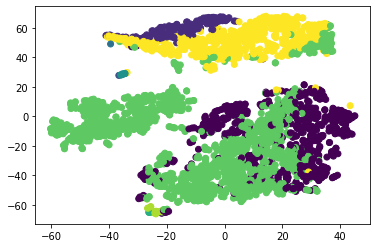

In [18]:
p = kmeansCluster(d, kvalue)
plotTSNE(p)

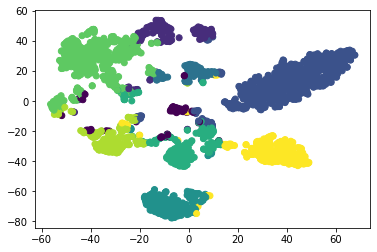

In [99]:
# p = softCluster(preprocessed_data, 9)
# plotElbow(preprocessed_data)
p = kmeansCluster(preprocessed_data, kvalue)
plotTSNE(p)

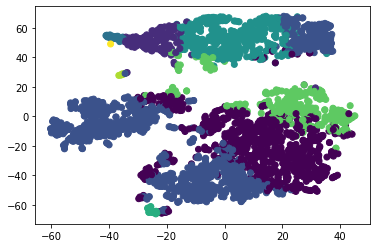

0.21963545843056792

In [21]:
p = kmeansCluster(preprocessed_data, kvalue)
plotTSNE(p)
ss(preprocessed_data, p)

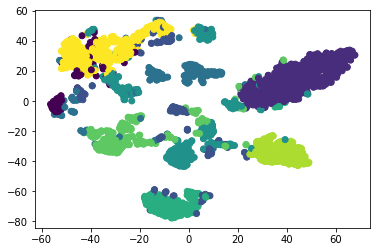

0.28240998903425685

In [101]:
p,prob = softCluster(preprocessed_data, kvalue)
plotTSNE(p)
ss(preprocessed_data, p)

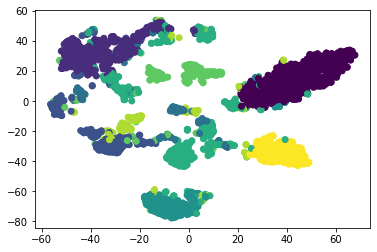

0.3196313436864066

In [102]:
p,prob = softCluster(preprocessed_data, kvalue)
plotTSNE(p)
ss(preprocessed_data, p)

In [ ]:
plotTSNE()

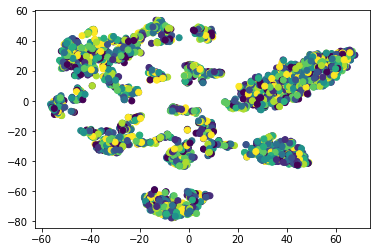

-0.030800786768595764

In [103]:
from sklearn.kernel_approximation import RBFSampler
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(preprocessed_data)
p = kmeansCluster(X_features, kvalue)
plotTSNE(p)
ss(preprocessed_data, p)

poly = 1


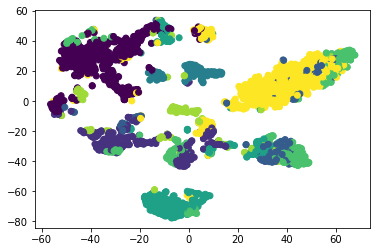

poly = 2


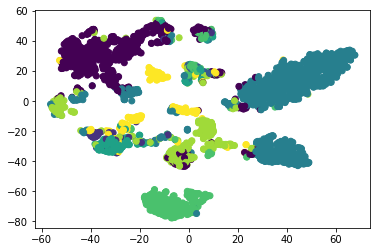

poly = 3


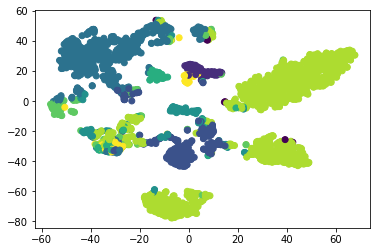

poly = 4


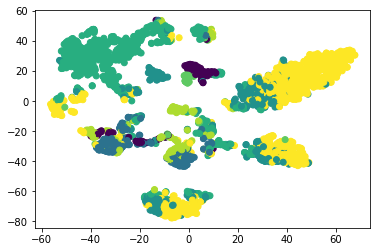

poly = 5


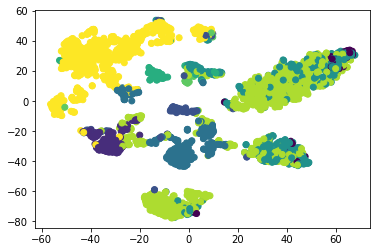

sigma = 0.1


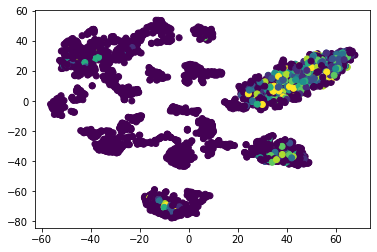

sigma = 0.2


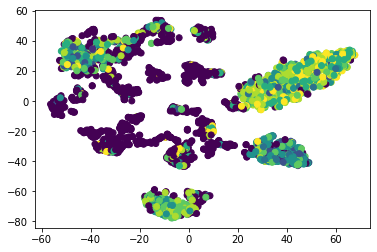

sigma = 0.30000000000000004


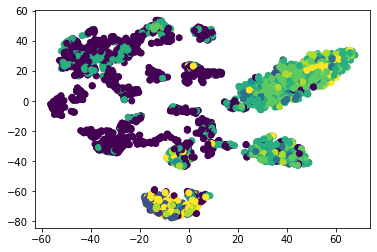

sigma = 0.4


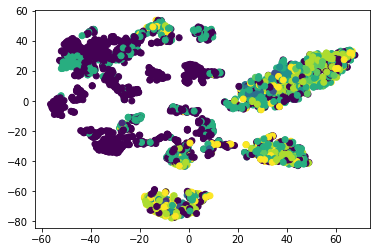

sigma = 0.5


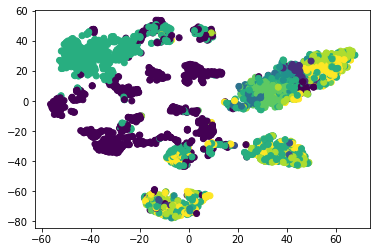

sigma = 0.6


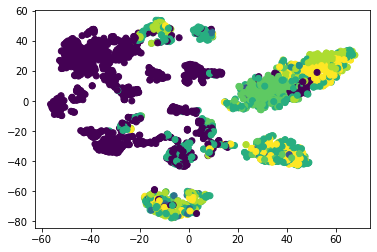

sigma = 0.7000000000000001


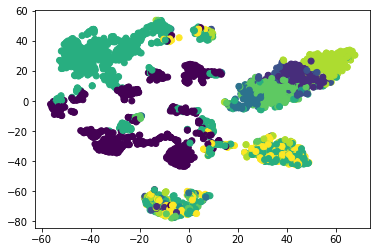

sigma = 0.8


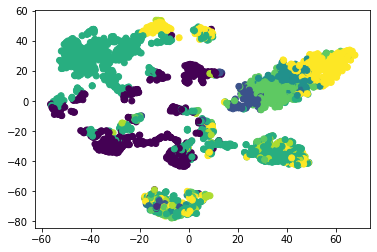

sigma = 0.9


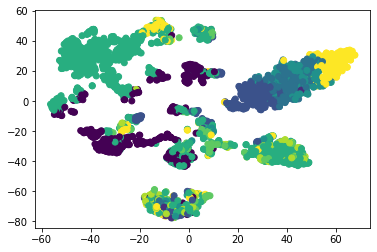

sigma = 1.0


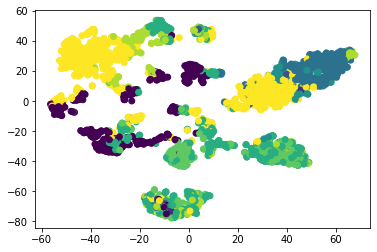

In [104]:
def findEigen(covariance_matrix):
    eigen_value,eigen_vector= np.linalg.eig(covariance_matrix)
    return eigen_value,eigen_vector

def findTopKEigenVec(eigen_vector,eigen_value,k):
    n=eigen_value.shape[0]
    highest_eigen_val_index = eigen_value.argsort()[::-1]
    w=[] #top k eigen vectors are stored
    for i in range(k):
        w.append(np.array(eigen_vector[:,highest_eigen_val_index[i]]))
        w[i]=w[i].reshape(eigen_vector.shape[1],1)
    return w

def polynomial_kernel(x,y,p):
    value=(x.transpose() @ y) + 1
    value=value**p;
    return value;

def gaussian_kernel(x,y,sigma):
    sub_val=x-y
    power_term=-(sub_val.transpose() @ sub_val)/(2*(sigma**2))
    value=np.exp(power_term)
    return value

def computePolynomilaKernelMatrix(data,polynomial):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=polynomial_kernel(data[:,i],data[:,j],polynomial)
    
    return K
def computeGaussianKernelMatrix(data,sigma):
    size=data.shape[1]
    K=np.zeros([size,size])
    for i in range(size):
        for j in range(size):
            K[i][j]=gaussian_kernel(data[:,i],data[:,j],sigma)
    
    return K

def KKmeans(K):
    k=kvalue
    
    K_eigenvalue,K_eigenvector=findEigen(K)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,kvalue)
    
    H=np.concatenate( beta, axis=1 )
    
    indicator=np.argmax(H,axis=1)
    
    return indicator

def spectralKmeans(K):
    
    K_eigenvalue,K_eigenvector=findEigen(K)
    beta=findTopKEigenVec(K_eigenvector,K_eigenvalue,20)
    
    H=np.concatenate( beta, axis=1 )
    
    norm=np.linalg.norm(H, axis=1)
    
    H=H.real
    for i in range(len(H)):
        H[i] = (H[i]/norm[i]) if norm[i] != 0 else 0
    
    p = kmeansCluster(H, kvalue)
    return p
    

polynomials=[1,2,3,4,5]
sigmas=np.arange(0.1,1.1,0.1)

for polynomial in polynomials:
    print(f'poly = {polynomial}')
    K=computePolynomilaKernelMatrix(preprocessed_data.T,polynomial)
    p = KKmeans(K)
    plotTSNE(p)
    ss(preprocessed_data, p)

for sigma in sigmas:
    print(f'sigma = {sigma}')
    K=computeGaussianKernelMatrix(preprocessed_data.T,sigma)
    p = KKmeans(K)
    plotTSNE(p)
    ss(preprocessed_data, p)
    
# k = computeGaussianKernelMatrix(preprocessed_data.T, 0.1)
# p = spectralKmeans(k)
# plotTSNE(p)
# ss(preprocessed_data, p)

poly = 1


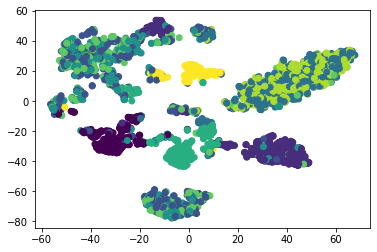

poly = 2


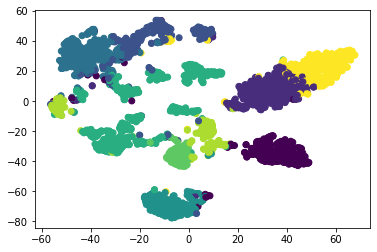

poly = 3


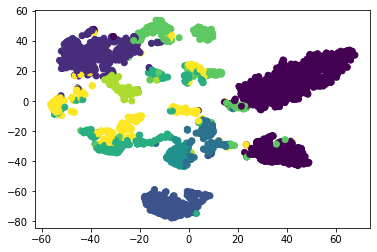

poly = 4


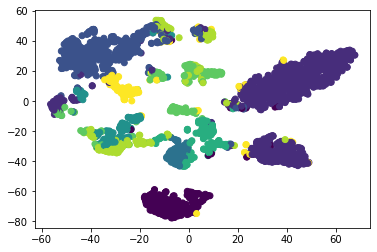

poly = 5


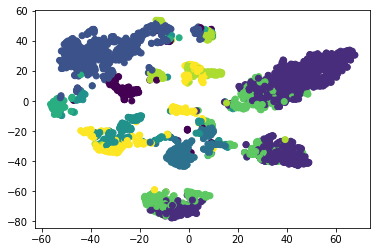

sigma = 0.1


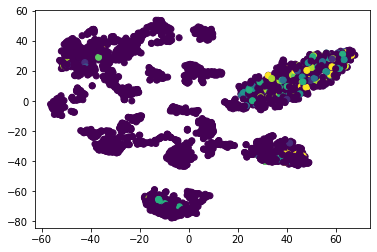

sigma = 0.2


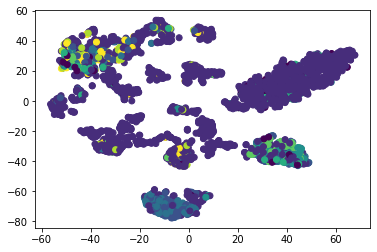

sigma = 0.30000000000000004


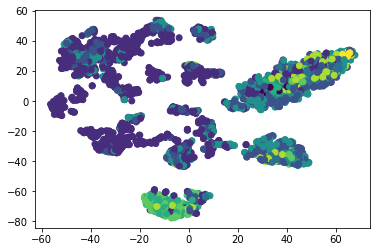

sigma = 0.4


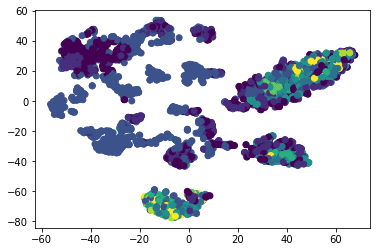

sigma = 0.5


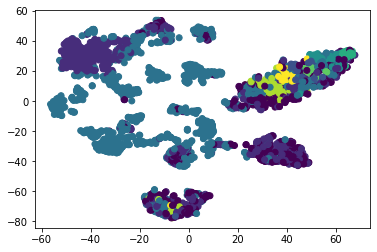

sigma = 0.6


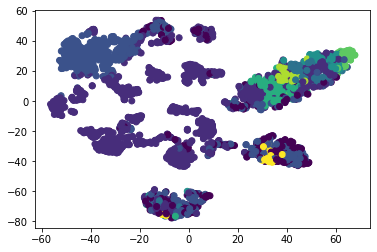

sigma = 0.7000000000000001


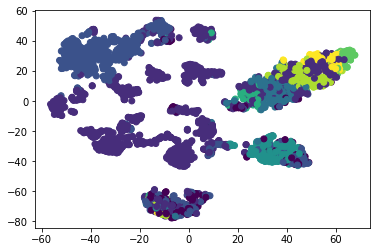

sigma = 0.8


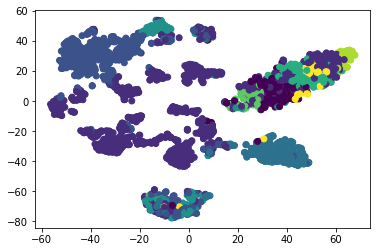

sigma = 0.9


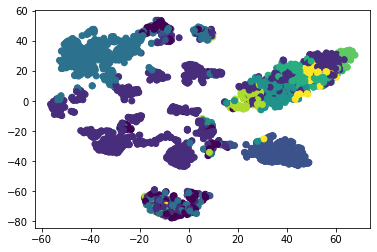

sigma = 1.0


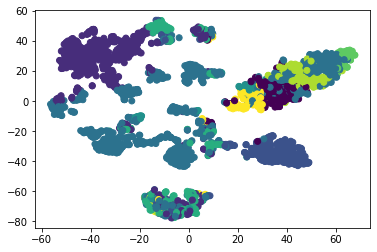

In [105]:
polynomials=[1,2,3,4,5]
sigmas=np.arange(0.1,1.1,0.1)

for polynomial in polynomials:
    print(f'poly = {polynomial}')
    K=computePolynomilaKernelMatrix(preprocessed_data.T,polynomial)
    p = spectralKmeans(K)
    plotTSNE(p)
    ss(preprocessed_data, p)

for sigma in sigmas:
    print(f'sigma = {sigma}')
    K=computeGaussianKernelMatrix(preprocessed_data.T,sigma)
    p = spectralKmeans(K)
    plotTSNE(p)
    ss(preprocessed_data, p)

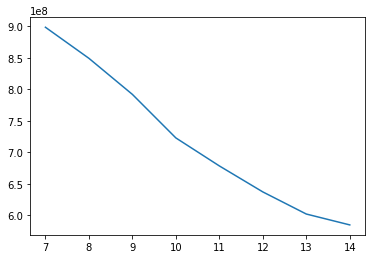

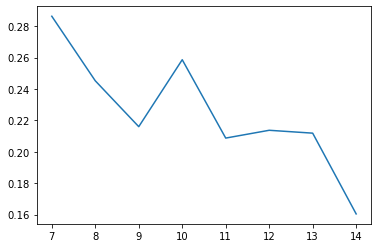

In [20]:
def plotElbow(X):
    # elbow method
    wcss = []
    sslist = []
    start = 7
    end = 15
    for i in range(start,end): 
      kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
      kmeans.fit(X) 
      wcss.append(kmeans.inertia_)
      sslist.append(ss(X, kmeans.labels_))
    
    k_values = [i  for i in range(start,end)]
    plt.plot(k_values, wcss)
    plt.show()
    plt.plot(k_values, sslist)
    plt.show()

plotElbow(preprocessed_data)


In [109]:
# clustering = SpectralClustering(n_clusters=9, assign_labels='discretize', random_state=0).fit(preprocessed_data)
# p = clustering.labels_
# plotTSNE(preprocessed_data, p)

/home/tharikh/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


KeyboardInterrupt: 

In [130]:
a = np.array([[1,2,3],[7,9,1]])
np.mean(a,axis = 0)

array([4. , 5.5, 2. ])

In [4]:
a = np.array([[1,2,3],[1,4,6],[1,4,4],[1,3,6]])

In [6]:
normalize(a,axis=0)

array([[0.5       , 0.2981424 , 0.30460385],
       [0.5       , 0.59628479, 0.6092077 ],
       [0.5       , 0.59628479, 0.40613847],
       [0.5       , 0.4472136 , 0.6092077 ]])

In [52]:
b = a/a.sum(axis=0)
b

array([[0.25      , 0.15384615, 0.15789474],
       [0.25      , 0.30769231, 0.31578947],
       [0.25      , 0.30769231, 0.21052632],
       [0.25      , 0.23076923, 0.31578947]])

In [53]:
entropy(b,axis=0)

array([1.38629436, 1.35168119, 1.34748488])

In [22]:
a = np.array([1,1,1,3,4])
b = np.array([1,2,2,3,1])

In [21]:
sum(1 for x,y in zip(a,b) if x == y) / len(a)

0.4

In [34]:
def calculateAccuracy(true_label, predicted_label):
    return sum(1 for x,y in zip(true_label,predicted_label) if x == y) / len(true_label)

def assignLabels(true_label,predicted_label):
    num_labels = len(true_label)
    d = {}
    new_predicted_label = []
    
    for i in range(num_labels):
        if d.get(predicted_label[i]) == None :
            d[predicted_label[i]] = []
        
        d[predicted_label[i]].append(true_label[i])
    
    for key in d:
        d[key] = max(d[key],key=d[key].count)
        
    for i in range(num_labels):
        new_predicted_label.append(d[predicted_label[i]])
        
    return new_predicted_label
    

def crossEntropyAccuracy():
    
    pass
    

In [26]:
t={}
if(t.get('1') == None):
    t['1']=1
else:
    t['1']+=1
t

{'1': 1}

In [27]:
if(t.get('1') == None):
    t['1']=1
else:
    t['1']+=1

In [32]:
true_label = ['T','T','T','T','T','F', 'F']
predicted = ['N','N','N','N','P','P','P']
new_predicted = assignLabels(true_label, predicted)

print(true_label)
print(predicted)
print(new_predicted)

['T', 'T', 'T', 'T', 'T', 'F', 'F']
['N', 'N', 'N', 'N', 'P', 'P', 'P']
['T', 'T', 'T', 'T', 'F', 'F', 'F']


In [35]:
calculateAccuracy(true_label, new_predicted)

0.8571428571428571

0.8571428571428571